In [1]:
from Code.Preprocess.DataPreparation import dataPrepare
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = dataPrepare()
X_train, X_test, y_train, y_test =  data.Vectorizer('/Users/aneruthmohanasundaram/Documents/GitHub/Spam_Detection/Code/Data/Youtube01-Psy.csv')

In [14]:
scaler = StandardScaler()
scaler.fit(X_train.toarray())
X_sc_train = scaler.transform(X_train.toarray())
X_sc_test = scaler.transform(X_test.toarray())

Text(0, 0.5, 'Cumulative explained variance')

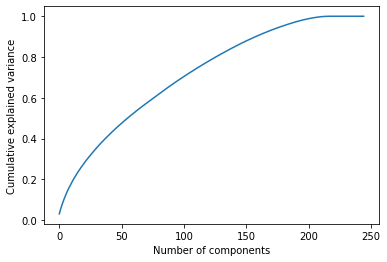

In [18]:
import numpy as np
pca = PCA(n_components=245) # To total number of rows present
pca.fit(X_train.toarray())

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [19]:
NCOMPONENTS = 100

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

print(X_sc_train.shape)
print(X_pca_train.shape)

(245, 1010)
(245, 100)


In [20]:
inv_pca = pca.inverse_transform(X_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)

In [46]:
'''
neural = Sequential()
neural.add(Dense(12, input_dim = X_train.shape[1], activation='relu')) # our input feature count is 1010 then we need to reduce the diemensions
neural.add(Dense(8, activation='relu'))
neural.add(Dense(1, activation='sigmoid'))

neural.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
'''
from keras.layers import GaussianNoise
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
# https://stackoverflow.com/questions/48851558/tensorflow-estimator-valueerror-logits-and-labels-must-have-the-same-shape
model = Sequential()
# layers = 1
# units = 128

model.add(Dense(12, input_dim=NCOMPONENTS, activation='relu'))
model.add(GaussianNoise(pca_std))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# https://stackoverflow.com/questions/61742556/valueerror-shapes-none-1-and-none-2-are-incompatible
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

his = model.fit(X_pca_train, y_train, epochs=100, batch_size=256, validation_split=0.15, verbose=2,validation_data=(X_pca_test, y_test), shuffle=True)

Epoch 1/100
1/1 - 0s - loss: 1.1258 - accuracy: 0.5048 - val_loss: 0.7632 - val_accuracy: 0.4595 - 457ms/epoch - 457ms/step
Epoch 2/100
1/1 - 0s - loss: 1.1055 - accuracy: 0.5481 - val_loss: 0.7658 - val_accuracy: 0.4324 - 16ms/epoch - 16ms/step
Epoch 3/100
1/1 - 0s - loss: 1.0637 - accuracy: 0.5096 - val_loss: 0.7669 - val_accuracy: 0.4324 - 17ms/epoch - 17ms/step
Epoch 4/100
1/1 - 0s - loss: 1.1295 - accuracy: 0.5048 - val_loss: 0.7676 - val_accuracy: 0.4324 - 18ms/epoch - 18ms/step
Epoch 5/100
1/1 - 0s - loss: 1.1354 - accuracy: 0.5240 - val_loss: 0.7677 - val_accuracy: 0.4324 - 23ms/epoch - 23ms/step
Epoch 6/100
1/1 - 0s - loss: 1.0833 - accuracy: 0.5240 - val_loss: 0.7679 - val_accuracy: 0.4324 - 21ms/epoch - 21ms/step
Epoch 7/100
1/1 - 0s - loss: 1.1319 - accuracy: 0.5337 - val_loss: 0.7682 - val_accuracy: 0.4595 - 24ms/epoch - 24ms/step
Epoch 8/100
1/1 - 0s - loss: 1.1670 - accuracy: 0.4567 - val_loss: 0.7683 - val_accuracy: 0.4865 - 22ms/epoch - 22ms/step
Epoch 9/100
1/1 - 0s -

In [38]:
predict_x = model.predict(X_pca_test)
classes_x = np.argmax(predict_x,axis=1)

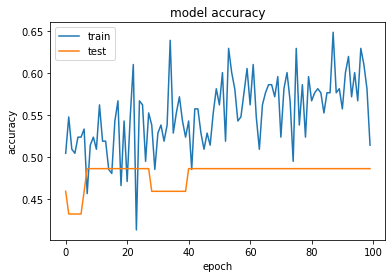

In [47]:
# summarize history for accuracy
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

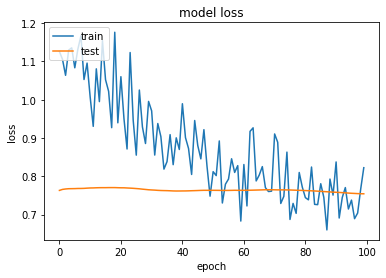

In [48]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [1]:
import pandas as pd
df = pd.read_csv('YoutubeComplete.csv',on_bad_lines='skip',delimiter='\t')

In [2]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1.0
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1.0
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1.0
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1.0
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1.0


In [8]:
df.shape

(1956, 5)

In [9]:
1956-1361

595